- P(reserve_price=900) = 0
- P(reserve_price=p) linearly increases from 0 @ p=900 up to p=1000

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
d_price = 0.001

prices = np.arange(900, 1000, d_price)  # reserve price
a = 0.0002  # pdf slope
pdf = a * prices - 900 * a

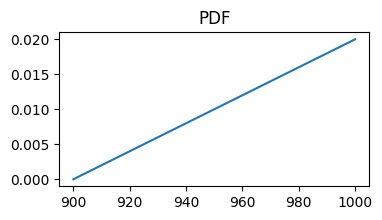

In [3]:
plt.figure(figsize=(4, 2))
plt.plot(prices, pdf)
plt.title('PDF')
plt.show()

In [4]:
cdf = (a / 2 * prices ** 2 - 900 * a * prices) - (a / 2 * 900 ** 2 - 900 * a * 900)

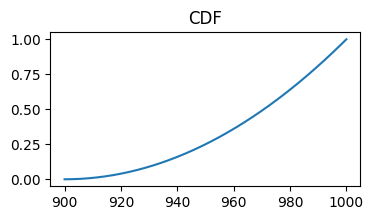

In [5]:
plt.figure(figsize=(4, 2))
plt.plot(prices, cdf)
plt.title('CDF')
plt.show()

In [6]:
dic_cdf = dict(zip(cdf, prices))

In [102]:
# %%time
# profits = {}
# for bid1 in np.arange(900, 1000):
#     for bid2 in np.arange(bid1, 1000):
#         profit = []
#         for _ in range(1000):
#             rand = np.random.random()
#             reserve_price = dic_cdf[cdf[cdf < rand][-1]]
#             if bid1 >= reserve_price:
#                 profit.append(1000 - bid1)
#             elif (bid1 < reserve_price) and (bid2 >= reserve_price):
#                 profit.append(1000 - bid2)
#             else:
#                 profit.append(0) 
#         profit = np.mean(profit)
#         profits[(bid1, bid2)] = profit

CPU times: total: 6min 16s
Wall time: 6min 18s


In [8]:
with open('save/round_1/profits.pickle', 'rb') as f:
    profits = pickle.load(f)

In [9]:
max_profit = max(profits.values())
best_bids = [k for k, v in profits.items() if v == max_profit]
print(f'Bid 1: {best_bids[0][0]}, Bid 2: {best_bids[0][1]}, profit: {max_profit}')

Bid 1: 939, Bid 2: 970, profit: 21.642


In [114]:
# with open('save/round_1/profits.pickle', 'wb') as f:
#     pickle.dump(profits, f)

In [56]:
b1_unique = np.unique(np.array([key[0] for key in profits.keys()]))
b2_unique = np.unique(np.array([key[1] for key in profits.keys()]))
x, y = np.meshgrid(b2_unique, b1_unique)
z = np.zeros(x.shape)
for i, xi in enumerate(b1_unique):
    for j, yi in enumerate(b2_unique):
        z[i, j] = profits.get((xi, yi), 0)

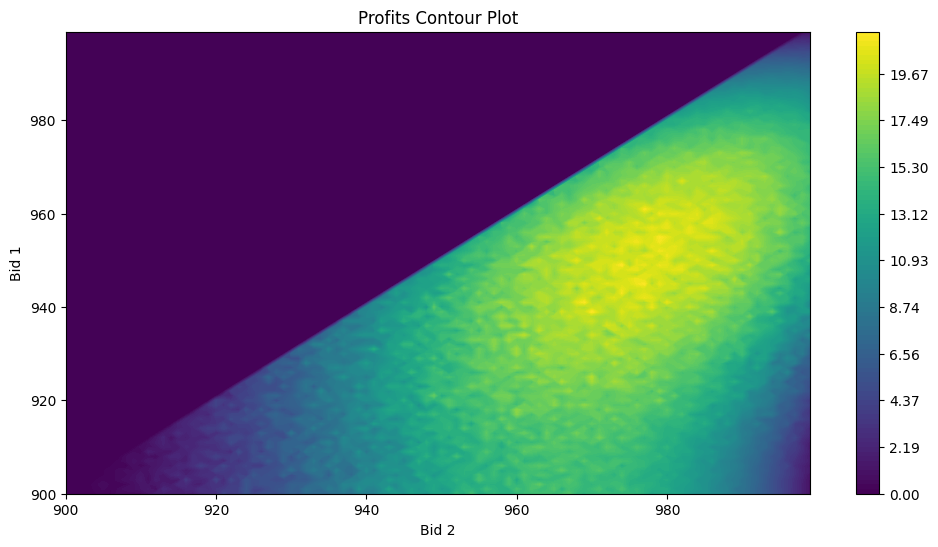

In [57]:
plt.figure(figsize=(12, 6))
plt.contourf(x, y, z, levels=np.linspace(z.min(), z.max(), 100), cmap='viridis')
plt.colorbar()
plt.title('Profits Contour Plot')
plt.xlabel('Bid 2')
plt.ylabel('Bid 1')
plt.show()

Best bids:  953 979


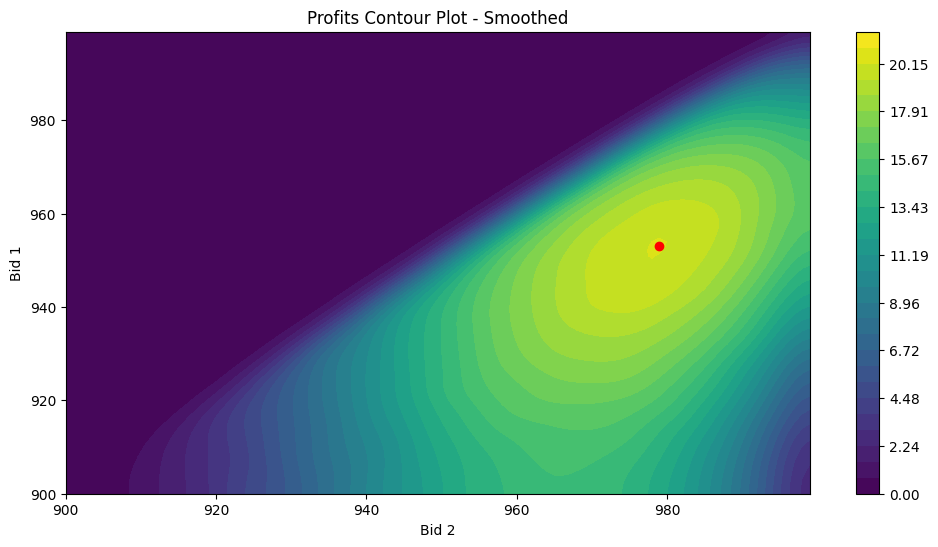

In [58]:
z_denoised = gaussian_filter(z, sigma=2.8)
bid1_opt = b1_unique[np.where(z_denoised == z_denoised.max())[0][0]]
bid2_opt = b2_unique[np.where(z_denoised == z_denoised.max())[1][0]]
print('Best bids: ', bid1_opt, bid2_opt)

plt.figure(figsize=(12, 6))
plt.contourf(x, y, z_denoised, levels=np.linspace(z.min(), z.max(), 30), cmap='viridis')
plt.plot(bid2_opt, bid1_opt, 'ro')
plt.colorbar()
plt.title('Profits Contour Plot - Smoothed')
plt.xlabel('Bid 2')
plt.ylabel('Bid 1')
plt.show()

In [59]:
l_bid1, l_bid2 = [], []
sig_range = np.arange(0, 5, 0.01)
for sig in sig_range:
    z_denoised = gaussian_filter(z, sigma=sig)
    bid1_opt = b1_unique[np.where(z_denoised == z_denoised.max())[0][0]]
    bid2_opt = b2_unique[np.where(z_denoised == z_denoised.max())[1][0]]
    l_bid1.append(bid1_opt)
    l_bid2.append(bid2_opt)

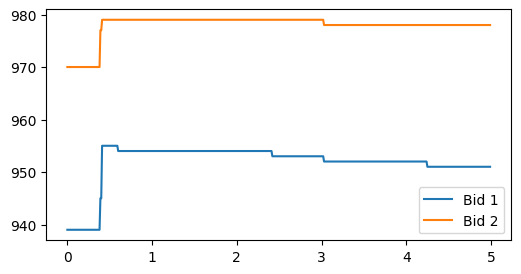

In [60]:
plt.figure(figsize=(6, 3))
plt.plot(sig_range, l_bid1, label='Bid 1')
plt.plot(sig_range, l_bid2, label='Bid 2')
plt.legend()
plt.show()

In [15]:
# %%time
# profits_fine = {}
# for bid1 in np.arange(930, 960):
#     for bid2 in np.arange(970, 990):
#         profit = []
#         for _ in range(10000):
#             rand = np.random.random()
#             reserve_price = dic_cdf[cdf[cdf < rand][-1]]
#             if bid1 >= reserve_price:
#                 profit.append(1000 - bid1)
#             elif (bid1 < reserve_price) and (bid2 >= reserve_price):
#                 profit.append(1000 - bid2)
#             else:
#                 profit.append(0) 
#         profit = np.mean(profit)
#         profits_fine[(bid1, bid2)] = profit

CPU times: total: 8min 50s
Wall time: 9min 24s


In [18]:
# with open('save/round_1/profits_fine.pickle', 'wb') as f:
#     pickle.dump(profits_fine, f)

In [61]:
max_profit = max(profits_fine.values())
best_bids = [k for k, v in profits_fine.items() if v == max_profit]
print(f'Bid 1: {best_bids[0][0]}, Bid 2: {best_bids[0][1]}, profit: {max_profit}')

Bid 1: 951, Bid 2: 978, profit: 20.5926


In [20]:
profits_fine[(951, 978)],profits_fine[(952, 978)],profits_fine[(953, 978)],profits_fine[(951, 979)], profits_fine[(952, 979)],profits_fine[(953, 978)]

(20.5926, 20.4234, 20.0789, 20.3252, 19.9977, 20.0789)

In [63]:
b1_unique = np.unique(np.array([key[0] for key in profits_fine.keys()]))
b2_unique = np.unique(np.array([key[1] for key in profits_fine.keys()]))
x, y = np.meshgrid(b2_unique, b1_unique)
z = np.zeros(x.shape)
for i, xi in enumerate(b1_unique):
    for j, yi in enumerate(b2_unique):
        z[i, j] = profits_fine.get((xi, yi), 0)

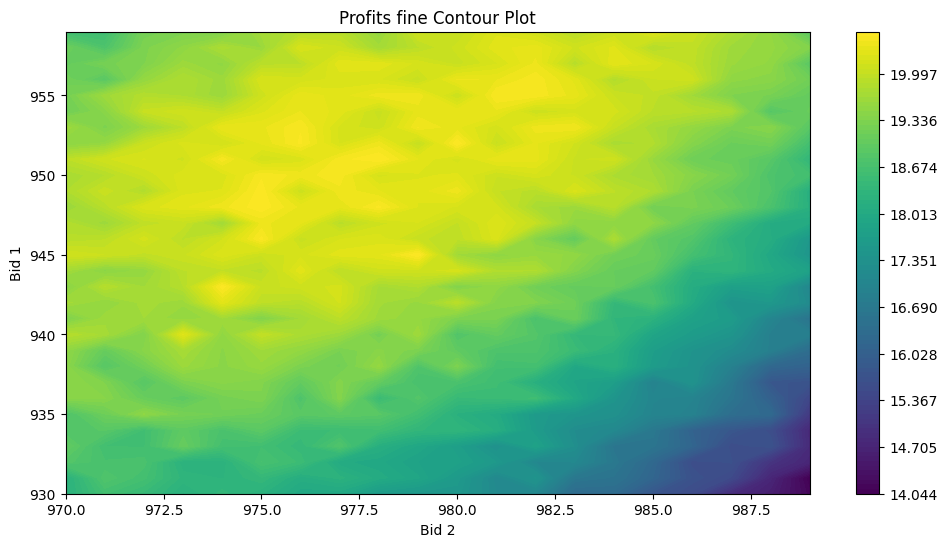

In [64]:
plt.figure(figsize=(12, 6))
plt.contourf(x, y, z, levels=np.linspace(z.min(), z.max(), 100), cmap='viridis')
plt.colorbar()
plt.title('Profits fine Contour Plot')
plt.xlabel('Bid 2')
plt.ylabel('Bid 1')
plt.show()

Best bids:  951 977


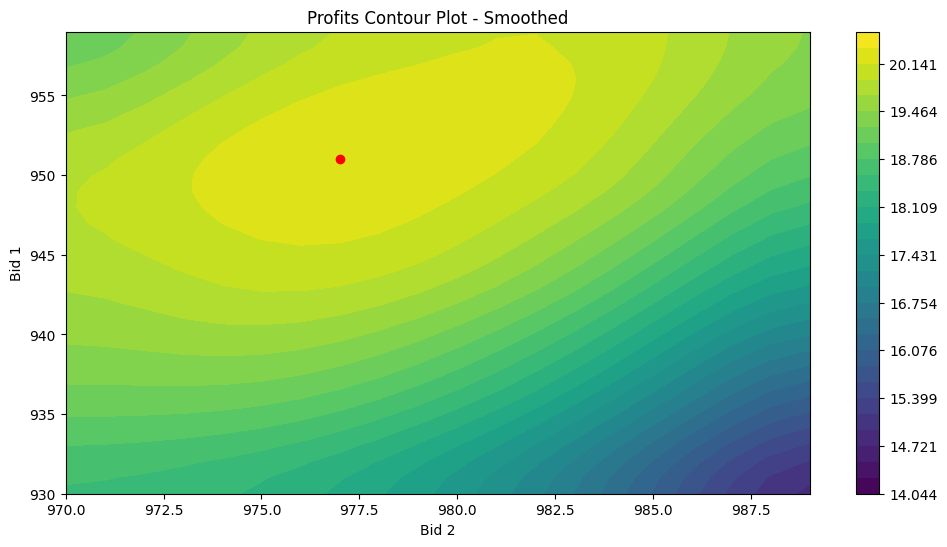

In [71]:
z_denoised = gaussian_filter(z, sigma=2)
bid1_opt = b1_unique[np.where(z_denoised == z_denoised.max())[0][0]]
bid2_opt = b2_unique[np.where(z_denoised == z_denoised.max())[1][0]]
print('Best bids: ', bid1_opt, bid2_opt)

plt.figure(figsize=(12, 6))
plt.contourf(x, y, z_denoised, levels=np.linspace(z.min(), z.max(), 30), cmap='viridis')
plt.plot(bid2_opt, bid1_opt, 'ro')
plt.colorbar()
plt.title('Profits Contour Plot - Smoothed')
plt.xlabel('Bid 2')
plt.ylabel('Bid 1')
plt.show()

In [72]:
l_bid1, l_bid2 = [], []
sig_range = np.arange(0, 5, 0.01)
for sig in sig_range:
    z_denoised = gaussian_filter(z, sigma=sig)
    bid1_opt = b1_unique[np.where(z_denoised == z_denoised.max())[0][0]]
    bid2_opt = b2_unique[np.where(z_denoised == z_denoised.max())[1][0]]
    l_bid1.append(bid1_opt)
    l_bid2.append(bid2_opt)

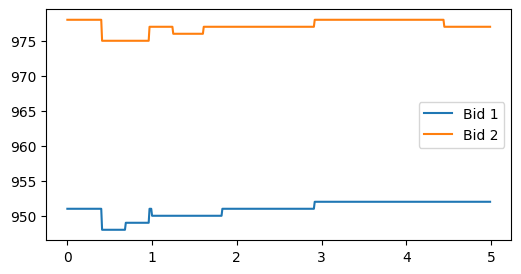

In [73]:
plt.figure(figsize=(6, 3))
plt.plot(sig_range, l_bid1, label='Bid 1')
plt.plot(sig_range, l_bid2, label='Bid 2')
plt.legend()
plt.show()

In [75]:
min(l_bid1), max(l_bid1), min(l_bid2), max(l_bid2) 

(948, 952, 975, 978)

In [85]:
# %%time
# profits_finer = {}
# for bid1 in np.arange(948, 953):
#     for bid2 in np.arange(975, 981):
#         profit = []
#         for _ in range(100000):
#             rand = np.random.random()
#             reserve_price = dic_cdf[cdf[cdf < rand][-1]]
#             if bid1 >= reserve_price:
#                 profit.append(1000 - bid1)
#             elif (bid1 < reserve_price) and (bid2 >= reserve_price):
#                 profit.append(1000 - bid2)
#             else:
#                 profit.append(0) 
#         profit = np.mean(profit)
#         profits_finer[(bid1, bid2)] = profit

CPU times: total: 3min 19s
Wall time: 3min 19s


In [90]:
# with open('save/round_1/profits_finer.pickle', 'wb') as f:
#     pickle.dump(profits_finer, f)

In [86]:
max_profit = max(profits_finer.values())
best_bids = [k for k, v in profits_finer.items() if v == max_profit]
print(f'Bid 1: {best_bids[0][0]}, Bid 2: {best_bids[0][1]}, profit: {max_profit}')

Bid 1: 950, Bid 2: 977, profit: 20.53844


In [87]:
b1_unique = np.unique(np.array([key[0] for key in profits_finer.keys()]))
b2_unique = np.unique(np.array([key[1] for key in profits_finer.keys()]))
x, y = np.meshgrid(b2_unique, b1_unique)
z = np.zeros(x.shape)
for i, xi in enumerate(b1_unique):
    for j, yi in enumerate(b2_unique):
        z[i, j] = profits_finer.get((xi, yi), 0)

Best bids:  950 977


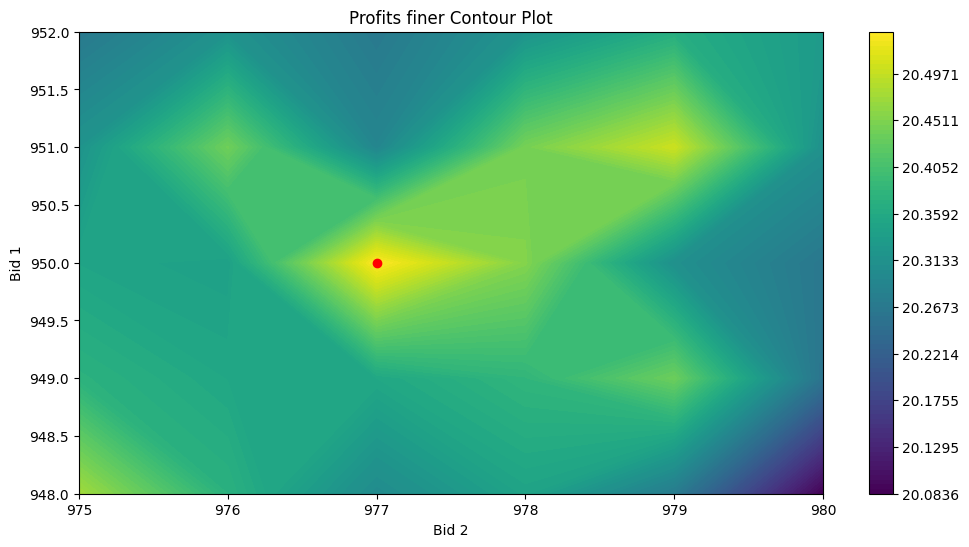

In [89]:
bid1_opt = b1_unique[np.where(z == z.max())[0][0]]
bid2_opt = b2_unique[np.where(z == z.max())[1][0]]
print('Best bids: ', bid1_opt, bid2_opt)

plt.figure(figsize=(12, 6))
plt.contourf(x, y, z, levels=np.linspace(z.min(), z.max(), 100), cmap='viridis')
plt.plot(bid2_opt, bid1_opt, 'ro')
plt.colorbar()
plt.title('Profits finer Contour Plot')
plt.xlabel('Bid 2')
plt.ylabel('Bid 1')
plt.show()

In [7]:
%%time

bid1 = 950
bid2 = 977
profit = []
for _ in range(1000000):
    rand = np.random.random()
    reserve_price = dic_cdf[cdf[cdf < rand][-1]]
    if bid1 >= reserve_price:
        profit.append(1000 - bid1)
    elif (bid1 < reserve_price) and (bid2 >= reserve_price):
        profit.append(1000 - bid2)
    else:
        profit.append(0) 
profit = np.mean(profit)
print(f'Bid 1: {bid1} - Bid 2: {bid2} --> {profit}')

Bid 1: 950 - Bid 2: 977 --> 20.38834
CPU times: total: 1min 15s
Wall time: 1min 16s


In [8]:
%%time

bid1 = 952
bid2 = 978
profit = []
for _ in range(1000000):
    rand = np.random.random()
    reserve_price = dic_cdf[cdf[cdf < rand][-1]]
    if bid1 >= reserve_price:
        profit.append(1000 - bid1)
    elif (bid1 < reserve_price) and (bid2 >= reserve_price):
        profit.append(1000 - bid2)
    else:
        profit.append(0) 
profit = np.mean(profit)
print(f'Bid 1: {bid1} - Bid 2: {bid2} --> {profit}')

Bid 1: 952 - Bid 2: 978 --> 20.433038
CPU times: total: 1min 13s
Wall time: 1min 13s


# Best bids: 952, 978